# Loading Libraries 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

1. Matplotlib plots graph on `Figure`
2. `Axes` plotting area which attached to the `Figure`
3. `Axis` set scale and limit and generate ticks (`ticks` marks on the `axis`). `Locator` and `Formatter` objects has full control over where and how `ticks` and `ticks_labels` appeares on the `axis`.
4. `Artist` object is the parent object for `figure`, `axes`, `axis` and everything on the figure. when figure is rendered, all the `artist` objects renderend on the canvas. most `artists` are tied to its `axes` which means it cannot shared or moved to another `axes`.

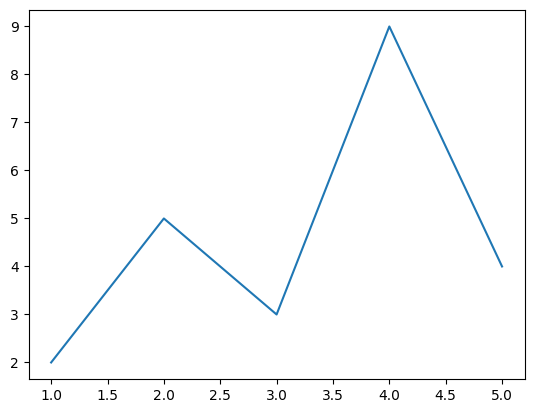

In [2]:
# simple way 
fig, ax =  plt.subplots()
ax.plot([1,2,3,4,5], [2,5,3,9,4])
plt.show()

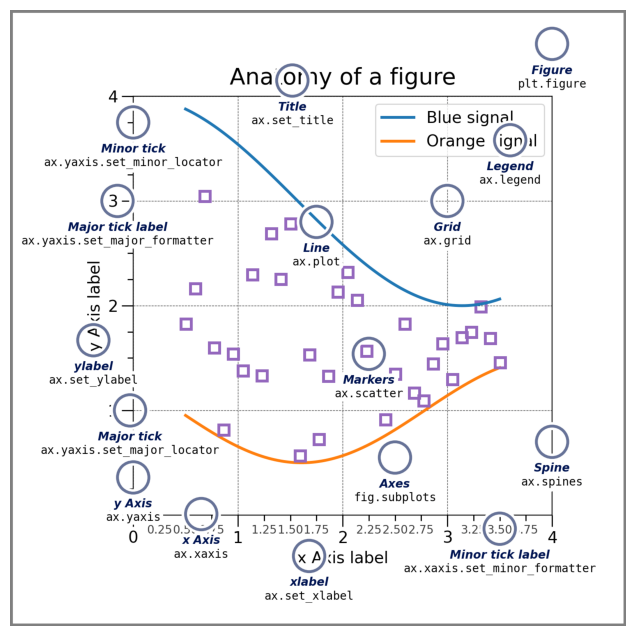

In [3]:
# parts of the figures

import matplotlib.image as mpimg

# loading the image

img = mpimg.imread("./anatomy.webp")

# showing the image
fig, ax = plt.subplots(figsize = (10,8))
ax.axis("off")
ax.imshow(img)
plt.show()

## Creating figures

In [4]:
# an empty figure withour axes

fig = plt.figure()

<Figure size 640x480 with 0 Axes>

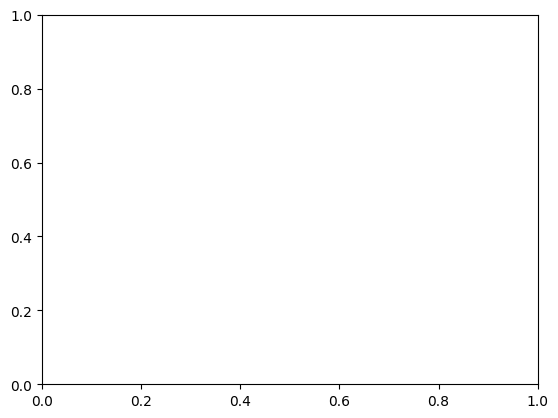

In [5]:
# A figure with single axes

fig, ax = plt.subplots()

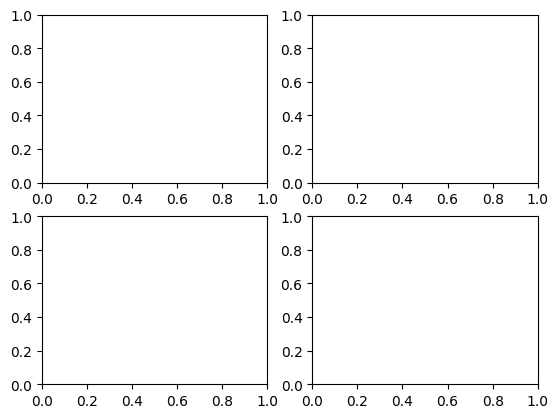

In [6]:
# a figure with 2x2 axes (4 plots)

fig, axs = plt.subplots(2,2)


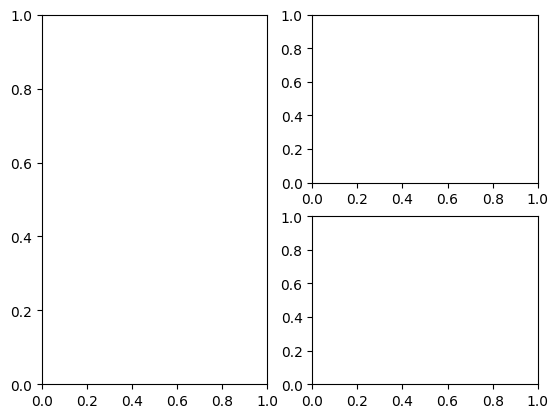

In [7]:
# A figure with one axes on the left and two axes on the right

fig, axs = plt.subplot_mosaic([["left", "right_top"],
                              ["left", "right_botton"]])

## Input

1. plotting function accepts `numpy.array` or `numpy.ma.masked_array` or objects which can be passed to `numpy.asarray` as input.
2. other array like objects (ex: `pandas`) objects and `numpy.matrix` may not work as intended.
3. Best practice should convert the input into `numpy.array` before passing to plotting functions in `matplotlib`.
4. Most methods accept string-like indexable objects (dict, structured numpy array or `pandas.DataFrame`.
5. `matplotlib` allows pass entire data into `data` objects and provide `string` feature titles/ names to corresponding x, y variables.


In [8]:
# Prepare the data

np.random.seed(2025)
data = {
    "a": np.arange(50),
    "c":np.random.randint(0,50,50),
    "d":np.random.randn(50)}

data["b"] = data["a"] + 10 * np.random.randn(50)
data["d"] = np.abs(data["d"])*100

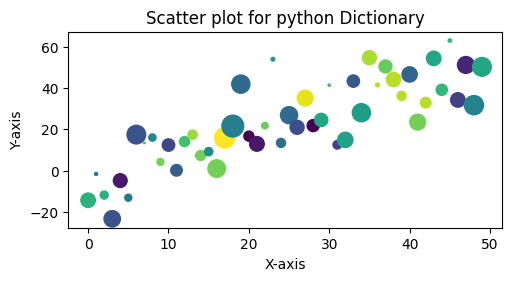

In [9]:
# Plotting scatter

fig, axs = plt.subplots(figsize = (5, 2.7), layout = "constrained")
axs.scatter("a", "b", c="c", s="d", data= data)
axs.set_xlabel("X-axis")
axs.set_ylabel("Y-axis")
axs.set_title("Scatter plot for python Dictionary")
plt.show()

# Coding styles
there is two ways using `matplotlib` to create plots
1. Explicit way - create `figure` and `axes`. then, call methods on then (Object-oriented style)
2. Implicit way - relaying `pyplot` on creating `figure` and `axes`. then `pyplot` functions to plot
3. `(out of scope)` Embedding matplotlib in GUI - API 


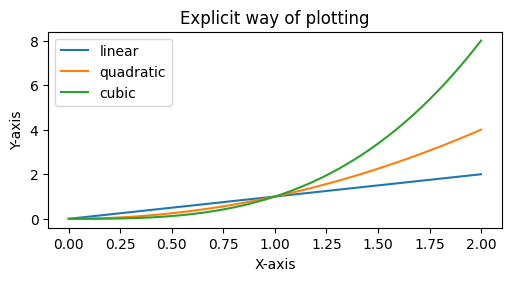

In [10]:
# Explicit way - starting from figure

## Preparing data
x = np.linspace(0,2,100)

# Plotting

fig, axs = plt.subplots(figsize = (5,2.7), layout = "constrained")
axs.plot(x,x, label = "linear")
axs.plot(x, x**2, label = "quadratic")
axs.plot(x, x**3, label ="cubic")
axs.set_xlabel("X-axis")
axs.set_ylabel("Y-axis")
axs.set_title("Explicit way of plotting")
axs.legend()
plt.show()

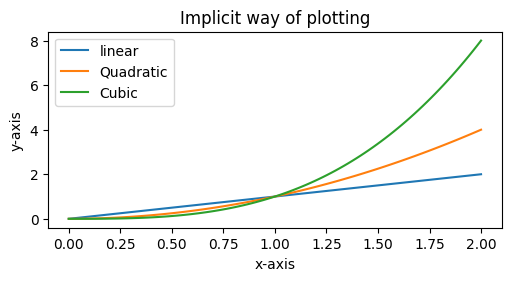

In [11]:
# Implicit way 

plt.figure(figsize = (5,2.7), layout = "constrained")
plt.plot(x, x, label= "linear")
plt.plot(x, x**2, label ="Quadratic")
plt.plot(x, x**3, label ="Cubic")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Implicit way of plotting")
plt.legend()
plt.show()

# Styling artists
we can set styles for `artist` objects using 
1. plotting methods
2. using `setter`s 

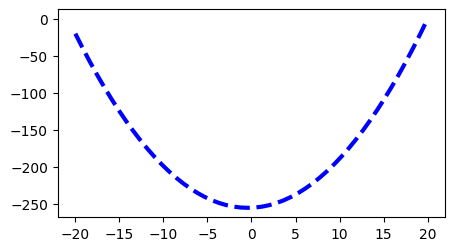

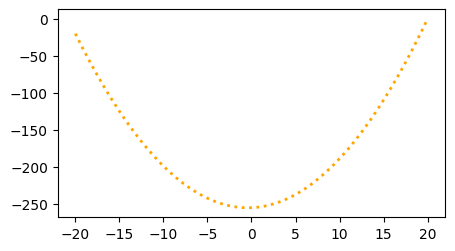

In [12]:
# Plotting methods

# Preparing data
x = np.linspace(-20, 20, 50)

fig, axs = plt.subplots(figsize = (5, 2.7))
axs.plot(x, np.cumsum(x), color="blue", linewidth = 3, linestyle ="--")

fig, axs = plt.subplots(figsize = (5, 2.7))
for_setter,  = axs.plot(x, np.cumsum(x), color="orange", linewidth = 2) # please notice the , after for_setter
for_setter.set_linestyle(":")

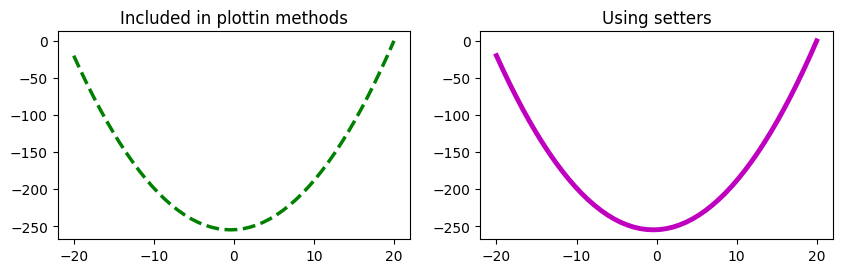

In [13]:
# Using subplots ==own

fig, axs = plt.subplots(1,2, figsize = (10, 2.7))

axs[0].plot(x, np.cumsum(x), color ="green", linewidth = 2.5, linestyle = "--")
axs[0].set_title("Included in plottin methods")


for_setter, = axs[1].plot(x, np.cumsum(x), color = "m")
axs[1].set_title("Using setters")
for_setter.set_linewidth(3.5)


## Colors
colors can be specified in a lot of ways
1. RGB - range(0-1) - syntax -> `(0.1, 0.5, 0.4)`
2. RGB hex - range(0 - f(15)) - syntax -> `"#0808df"` or `"#0808df10"` with `transperancy`.
3. RGB hex shorthand - rnage(0 - f(15)) - syntax -> `"#ab1"` for `"#aabb11"`.
4. Single value interval for gray scale values - range (0-1) - syntax -> `0`-black, `1`- white and `(0-1)` inbetween grayscale values.
5. Single short hand string notation -> `b`- blue, `g`- green, `r`- red, `c`- cyan, `m`- magenta, `y`- yellow, `k`- black, `w`- white.
6. Case-Senstive X11/CSS4 color names without spaces - https://learningwebdesign.com/colornames.html.
7. Case-insentitive color name with  xkch color survey - syntax-> `xkch:sky blue`, all other options:https://www.w3schools.com/colors/colors_xkcd.asp
8. Case-insentitive tableau colors from `T10` categorical palette - `tab:blue`, all other options: https://public.tableau.com/app/profile/chris.gerrard/viz/TableausCategoricalColorPalettesReferenceGuide_16161875336400/TableausCategoricalColorPalettes.
9. Tuple of one of the color format with alpha float for transperancy - syntax-> `('green', 0.3)`.
10. `None` - for transparent

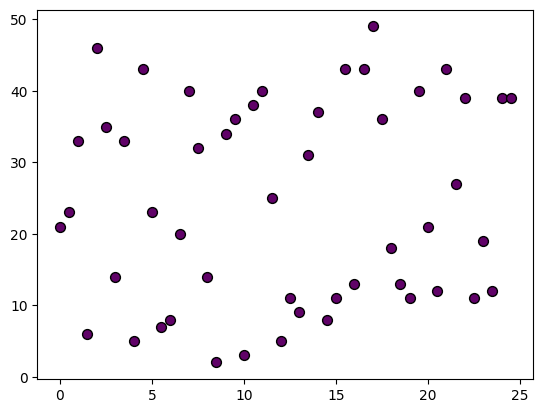

In [14]:
# some artist can accept more than one colors for different variables (ex: scatter)

data1 = np.arange(0, 25, 0.5)
data2 = np.random.randint(1, 50, 50)

fig, axs = plt.subplots()
axs.scatter(data1, data2, s =50, facecolor = "#600268", edgecolor = "k")
plt.show()

## Linewidths, linestyles and markersizes

1. `Linewidths` are typographic points (1pt = 1/72inch) and available for artists that have stroked lines.
2. `Linestyles` can be defined using string (`solid`, `dotted`, `dashed` or `dashdot`). more refined options with dash tuple `(offset, (on_off_seq))`.
3. Here are the available markers - https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers. `markerstyle` allows users to create their own markers with full control.

(0.0, 100.0)

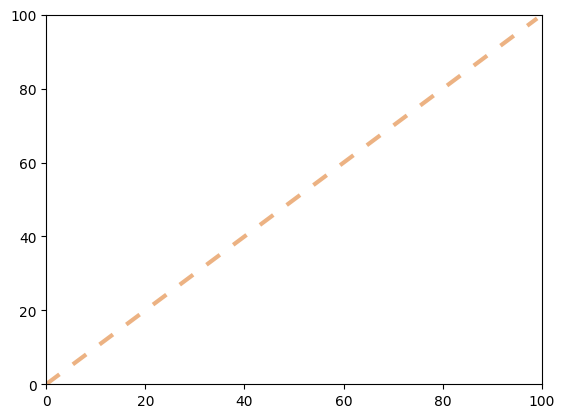

In [15]:
# colors

data = np.arange(0, 100,1)

fig, axs = plt.subplots()
axs.plot(data, linestyle = (0,(4,4)), color = "#df782390", linewidth = 3)
axs.set_xlim(0,100)
axs.set_ylim(0,100)

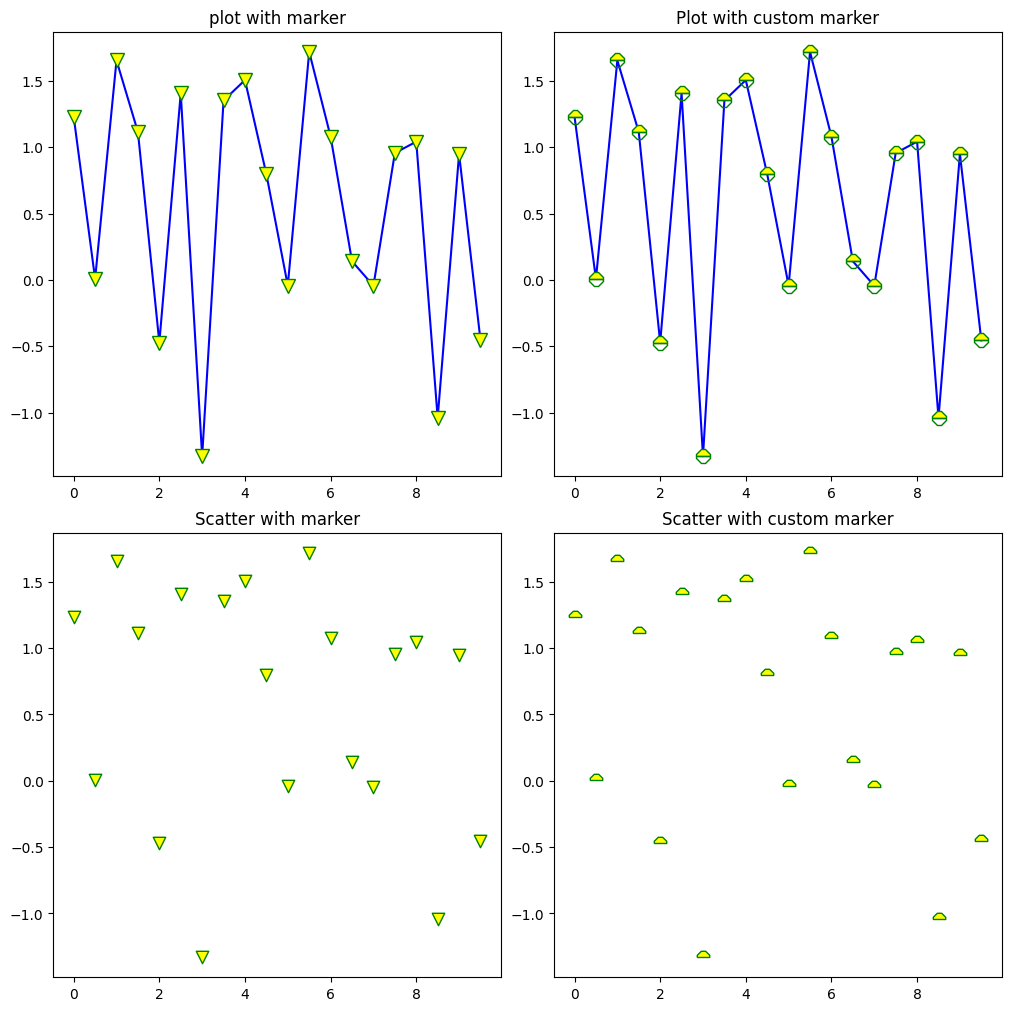

In [16]:
# Marker 

# Preparing data
x = np.arange(0,10,0.5)
y = np.random.randn(20)

# Creating the figure
fig, axs = plt.subplots(2,2, figsize = (10,10), layout = "constrained")

# plot

axs[0,0].plot(x,y,color = "b", marker ="v", markersize = 10, markerfacecolor = "yellow", markeredgecolor = "green")
axs[0,0].set_title("plot with marker")

# custom marker
from matplotlib.markers import MarkerStyle
custom_marker = MarkerStyle(marker = "8", fillstyle= "top")
axs[0,1].plot(x,y,color = "b", marker = custom_marker, markersize =10, markerfacecolor = "yellow", markeredgecolor = "green")
axs[0,1].set_title("Plot with custom marker")

# Scatter plot
axs[1,0].scatter(x,y, marker = "v",s = 80,edgecolor = "green", facecolor = "yellow")
axs[1,0].set_title("Scatter with marker")

# Custom marker
axs[1,1].scatter(x,y,marker = custom_marker, s = 80, edgecolor = "green", facecolor = "yellow")
axs[1,1].set_title("Scatter with custom marker")

plt.show()

# Labelling plots

## Axes labels and text
1. `set_title`, `set_xlabel`, `set_label` and `text` can be added to the plot

/home/nandhu/dsai/lib64/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 108 (l) missing from font(s) Lohit Tamil.
  fig.canvas.print_figure(bytes_io, **kw)
/home/nandhu/dsai/lib64/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 112 (p) missing from font(s) Lohit Tamil.
  fig.canvas.print_figure(bytes_io, **kw)
/home/nandhu/dsai/lib64/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 85 (U) missing from font(s) Lohit Tamil.
  fig.canvas.print_figure(bytes_io, **kw)
/home/nandhu/dsai/lib64/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 110 (n) missing from font(s) Lohit Tamil.
  fig.canvas.print_figure(bytes_io, **kw)
/home/nandhu/dsai/lib64/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 105 (i) missing from font(s) Lohit Tamil.
  fig.canvas.print_figure(bytes_io, **kw)
/home/nandhu/dsai/lib64/python3.13/site-packages/IPython/core/pylabtools.py:170: 

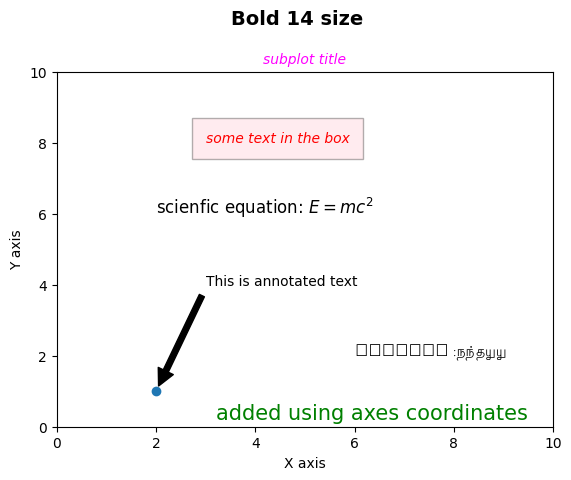

In [17]:
# figure

fig, axs = plt.subplots()

# adding more space at top the subplots
fig.subplots_adjust(top = 0.85)

# adding subtitle for the figure
fig.suptitle("Bold 14 size", fontsize = 14, fontweight = "bold")

axs.set_title("subplot title", fontsize = 10, color = "magenta", style = "italic") # subplot title

# adding the text inside box
axs.text(3,8, "some text in the box", style ="italic",color="red", bbox = {"facecolor":"pink", "alpha": 0.3, "pad":10}) 

# adding scientific equation
axs.text(2,6, f"scienfic equation: $E=mc^2$", fontsize = 12)  

# adding Tamil language supporting fonts to fontproperties
path_to_font = "./Lohit-Tamil.ttf"
from matplotlib.font_manager import FontProperties

font = FontProperties(fname =path_to_font)
# adding unicode
axs.text(6,2, "Unicode :நந்த௶௶", fontproperties = font)

# annotation
axs.plot([2],[1], marker = "o")
axs.annotate("This is annotated text", xy = (2,1), xytext = (3,4), arrowprops =dict(facecolor= "k", shrink = 0.05)) 

# adding text using axes coordinates
axs.text(0.95, 0.01, "added using axes coordinates", verticalalignment = "bottom", horizontalalignment ="right", 
         transform = axs.transAxes, color = "green",fontsize =15)


# Setting the s=x and y axis range
axs.axis([0,10,0,10])

axs.set_xlabel("X axis")
axs.set_ylabel("Y axis")

plt.show()


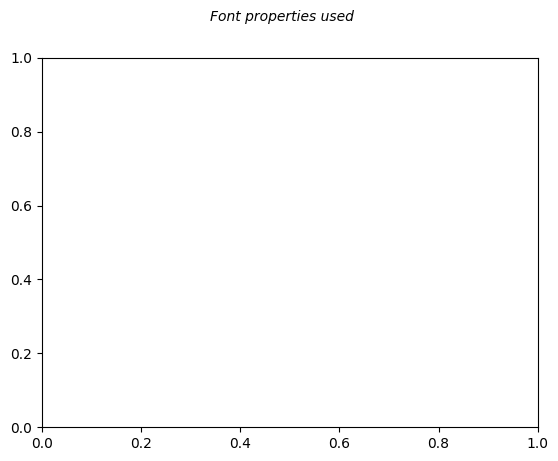

In [18]:
# Font properties variable - 

from matplotlib.font_manager import FontProperties
font = FontProperties(family ="sans-serif", style = "italic" )

fig, axs = plt.subplots()

fig.suptitle("Font properties used", fontproperties = font)

plt.show()

## Mathematical expressions
1. `matplotlib` accepts the `TeX equation` expressions.
2. when `text` precedes with `r` which indicates that the text will be treated as raw text (escape character is as raw text)


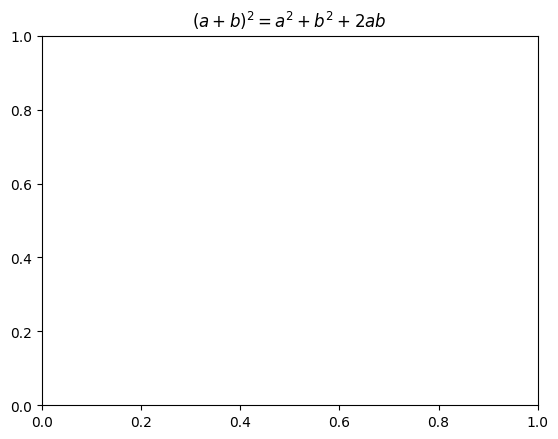

In [19]:
# mathematical expression

fig, axs = plt.subplots()

axs.set_title(r'${(a+b)^{2} = a^{2} + b^{2} +2ab}$')
plt.show()

## Legends

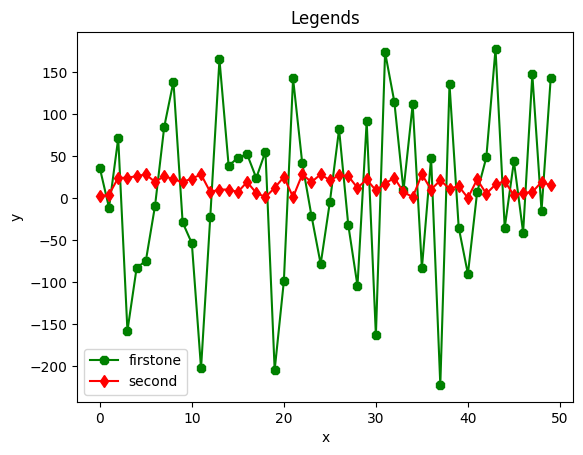

In [20]:
fig, axs =plt.subplots()
x = np.arange(50)
y1 = np.random.normal(0,100, 50)
y2 = np.random.randint(0, 30, 50)
axs.plot(x, y1, marker = "8",color ="g", label= "firstone")
axs.plot(x, y2, marker = "d",color ="r", label = "second")
axs.set_title("Legends")
axs.set_xlabel("x")
axs.set_ylabel("y")
axs.legend()
plt.show()

## Axis scales and ticks
1. `tick locators` and `tick formatters` can control tick locators and formatters.
2. `scale` can customised using `set_xscale`method on `axes`. predefined values includes `log`, `logit`, `symlog` and `function` followed by`custom function tuple`.
3. further read - `transformations` - https://matplotlib.org/stable/users/explain/artists/transforms_tutorial.html#transforms-tutorial


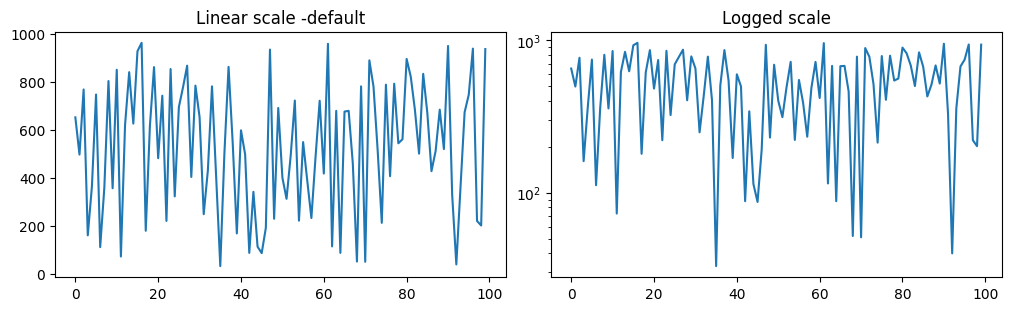

In [40]:
# Scales

fig, axs = plt.subplots(1,2,figsize = (10, 3), layout = "constrained")

y = np.random.randint(1, 1000, 100)

x = np.arange(0, len(y))

#Linear axis - default behaviour
axs[0].plot(x,y)
axs[0].set_title("Linear scale -default")
# Custome axis scales

axs[1].set_yscale("log")
axs[1].plot(x,y)
axs[1].set_title("Logged scale")
plt.show()

### tick locators and formatters
1. different predefined `scale` values  has different `locator` and `formatter`. for example: `log` - `loglocator` and `logformatter`

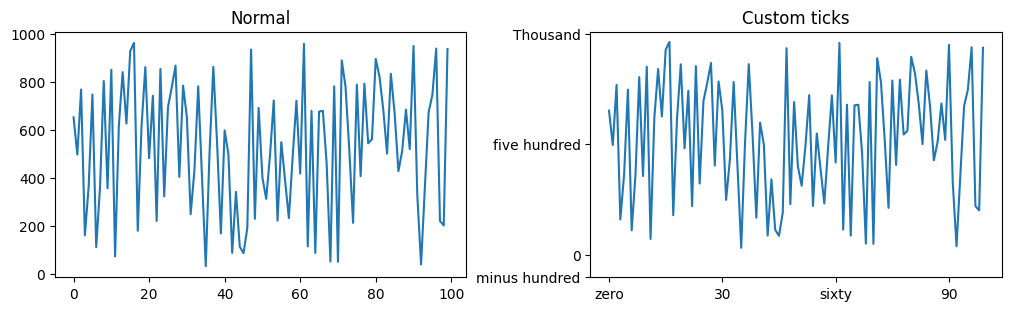

In [53]:
fig, axs = plt.subplots(1,2, figsize = (10,3), layout = "constrained")

# default behaviour

axs[0].plot(x,y)
axs[0].set_title("Normal")

# Custome ticks

axs[1].plot(x ,y)
axs[1].set_xticks(np.arange(0,100, 30),["zero", "30", "sixty", "90"])
axs[1].set_yticks([-100, 0,500,1000],["minus hundred", "0", "five hundred", "Thousand"])
axs[1].set_title("Custom ticks")
plt.show()

### Plotting dates and strings

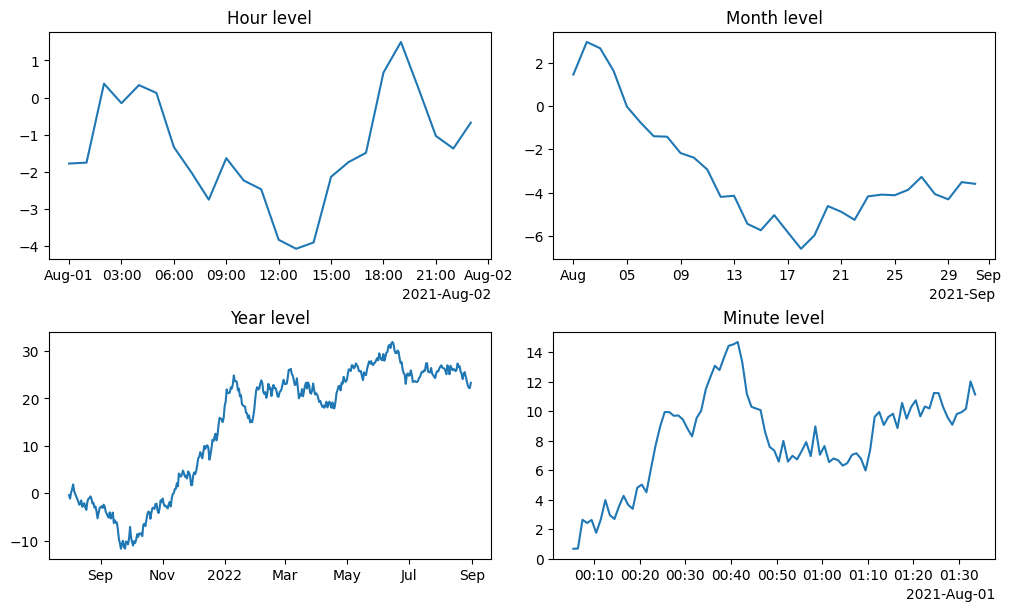

In [95]:
from matplotlib.dates import ConciseDateFormatter

fig,  axs = plt.subplots(2,2,figsize = (10,6), layout = "constrained")

h_dates = np.arange(np.datetime64("2021-08-01"), np.datetime64("2021-08-02"), np.timedelta64(1,"h"))
h_data = np.cumsum(np.random.randn(len(h_dates)))

# Hour level 
axs[0,0].plot(h_dates, h_data)
axs[0,0].xaxis.set_major_formatter(ConciseDateFormatter(ax.xaxis.get_major_locator()))
axs[0,0].set_title("Hour level")


m_dates = np.arange(np.datetime64("2021-08-01"), np.datetime64("2021-09-01"), np.timedelta64(1,"D"))
m_data = np.cumsum(np.random.randn(len(m_dates)))

# Month level - every day
axs[0,1].plot(m_dates, m_data)
axs[0,1].xaxis.set_major_formatter(ConciseDateFormatter(ax.xaxis.get_major_locator()))
axs[0,1].set_title("Month level")


y_dates = np.arange(np.datetime64("2021-08-01"), np.datetime64("2022-09-01"), np.timedelta64(1,"D"))
y_data = np.cumsum(np.random.randn(len(y_dates)))

# Year level - every day
axs[1,0].plot(y_dates, y_data)
axs[1,0].xaxis.set_major_formatter(ConciseDateFormatter(ax.xaxis.get_major_locator()))
axs[1,0].set_title("Year level")

# MInute level
m_dates = np.arange(np.datetime64("2021-08-01 00:05:30"), np.datetime64("2021-08-01 01:34:00"), np.timedelta64(1,"m"))
m_data = np.cumsum(np.random.randn(len(m_dates)))

# Month level - every day
axs[1,1].plot(m_dates, m_data)
axs[1,1].xaxis.set_major_formatter(ConciseDateFormatter(ax.xaxis.get_major_locator()))
axs[1,1].set_title("Minute level")

plt.show()

### secondart axis
1. when plotting multiple plot on single `axes` may require additional `axis` for clear interpretation using `twinx`.
2. we can add two `xaxis` for same plot with different `scales` using `secondary_xaxis`.

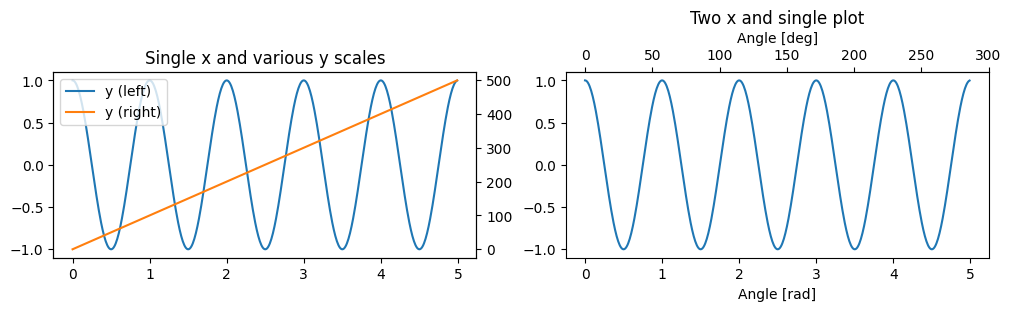

In [116]:
fig, [ax0, ax3] = plt.subplots(1,2, figsize = (10, 3), layout ="constrained")

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi *t)


l1, = ax0.plot(t,s)
ax2 = ax0.twinx()
l2, = ax2.plot(t, range(len(t)), color = "C1")
ax2.legend([l1,l2], ["y (left)","y (right)"])
ax2.set_title("Single x and various y scales")


ax3.plot(t,s)
ax3.set_xlabel("Angle [rad]")
ax4 = ax3.secondary_xaxis("top", (np.rad2deg, np.deg2rad)) # secondary_xaxis("position", (function scale A to scale B, function scale B to scale A)
ax4.set_xlabel("Angle [deg]")
ax3.set_title("Two x and single plot")
plt.show()

## color mapped data with colorbars
1. `color` considered to be third dimension in some two-dimensional plots. we can add `colorbar` to improve the interpretation.


Text(0.5, 1.0, 'contourf()')

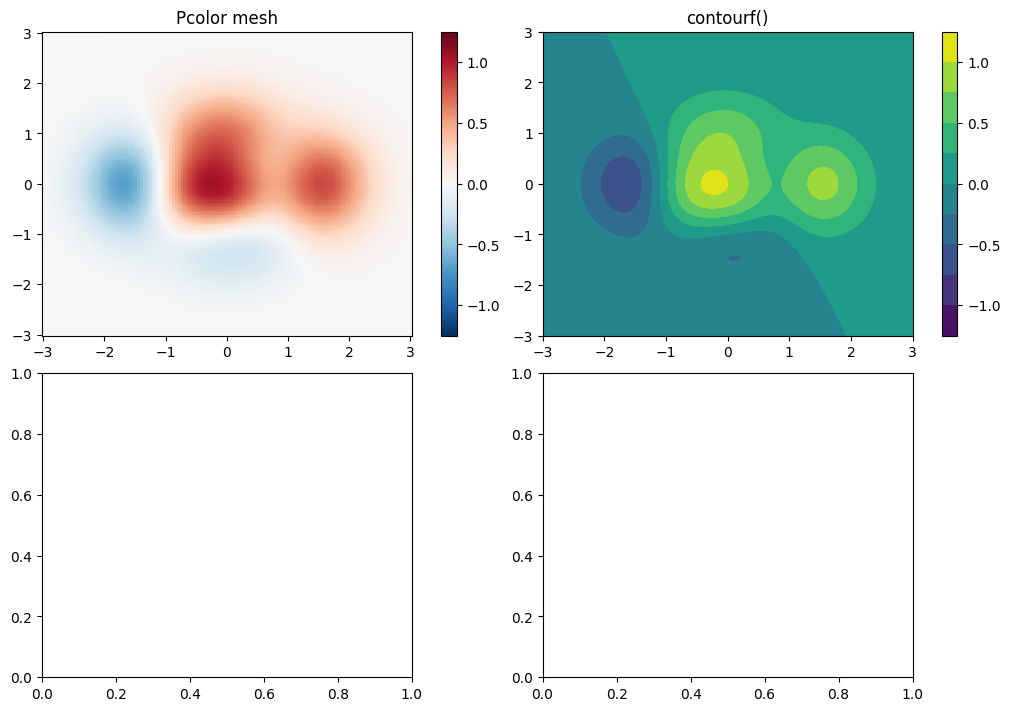

In [143]:
from matplotlib.colors import LogNorm

# Preparing the data
x, y = np.meshgrid(np.linspace(-3,3,128), np.linspace(-3,3,128))
z = (1 - x/2 + x**5 + y**3) * np.exp(-x**2 - y**2) # creating 3rd non linear dimension

# Creating figure with 2 x 2 subplots
fig, axs = plt.subplots(2,2, figsize = (10, 7), layout = "constrained")

# plot 1 - pcolor mesh
pc = axs[0,0].pcolormesh(x,y,z, vmin = -1.25, vmax = 1.25, cmap = "RdBu_r")
fig.colorbar(pc, ax= axs[0,0])
axs[0,0].set_title("Pcolor mesh")

# Plot 2 - contour f
co = axs[0,1].contourf(x,y,z, levels = np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax =axs[0,1])
axs[0,1].set_title("contourf()")

# Plot 3 - as image
im

In [121]:
z

array([[-4.07401958e-06, -5.02350400e-06, -6.16316058e-06, ...,
         4.77946843e-06,  3.97434715e-06,  3.28206063e-06],
       [-5.37177167e-06, -6.62138495e-06, -8.12045714e-06, ...,
         6.37591821e-06,  5.29862325e-06,  4.37328135e-06],
       [-7.05226182e-06, -8.68981924e-06, -1.06532184e-05, ...,
         8.46548703e-06,  7.03101577e-06,  5.80010944e-06],
       ...,
       [-5.74689051e-06, -6.96051338e-06, -8.37250416e-06, ...,
         1.07462012e-05,  8.76032163e-06,  7.10548074e-06],
       [-4.33292917e-06, -5.24516623e-06, -6.30541581e-06, ...,
         8.19095953e-06,  6.67484198e-06,  5.41212386e-06],
       [-3.25160068e-06, -3.93399496e-06, -4.72624950e-06, ...,
         6.21637951e-06,  5.06385618e-06,  4.10447954e-06]],
      shape=(128, 128))

In [118]:
np.meshgrid(np.linspace(-3,3,128), np.linspace(-3,3,128))

(array([[-3.        , -2.95275591, -2.90551181, ...,  2.90551181,
          2.95275591,  3.        ],
        [-3.        , -2.95275591, -2.90551181, ...,  2.90551181,
          2.95275591,  3.        ],
        [-3.        , -2.95275591, -2.90551181, ...,  2.90551181,
          2.95275591,  3.        ],
        ...,
        [-3.        , -2.95275591, -2.90551181, ...,  2.90551181,
          2.95275591,  3.        ],
        [-3.        , -2.95275591, -2.90551181, ...,  2.90551181,
          2.95275591,  3.        ],
        [-3.        , -2.95275591, -2.90551181, ...,  2.90551181,
          2.95275591,  3.        ]], shape=(128, 128)),
 array([[-3.        , -3.        , -3.        , ..., -3.        ,
         -3.        , -3.        ],
        [-2.95275591, -2.95275591, -2.95275591, ..., -2.95275591,
         -2.95275591, -2.95275591],
        [-2.90551181, -2.90551181, -2.90551181, ..., -2.90551181,
         -2.90551181, -2.90551181],
        ...,
        [ 2.90551181,  2.90551181,  

## Customisation and backend rendering

In [21]:
# jupyter backend 

# # default
%matplotlib inline



#interactive plots 
# need to install ipympl --> pip install ipympl
# %matplotlib widget



# advanced interactive shell ipython tool - more customisation required refer api
# %matplotlib notebook

# Creating Figures

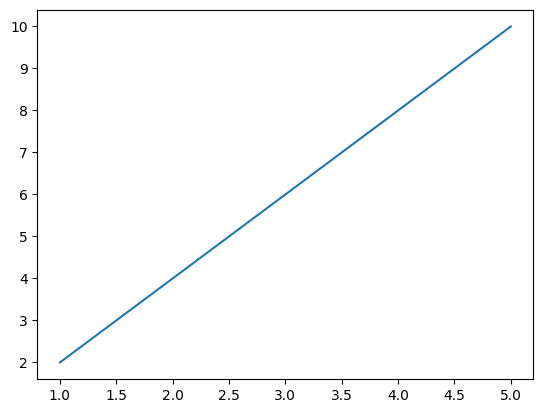

In [22]:
figure, axes = plt.subplots()

axes.plot([1,2,3,4,5],[2,4,6,8,10])

plt.show()

#### Creating figures

In [23]:
fig = plt.figure()   # figure with no axis


<Figure size 640x480 with 0 Axes>

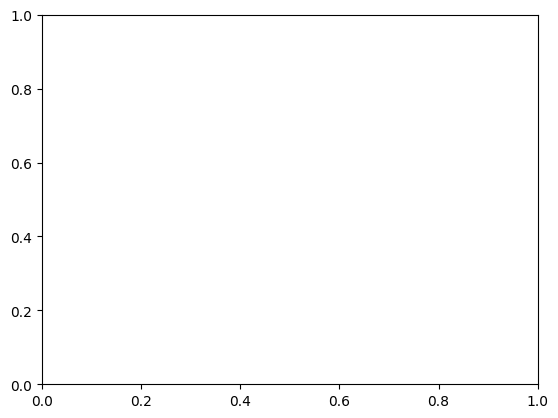

In [24]:
fig, ax = plt.subplots()  # figure with single axes

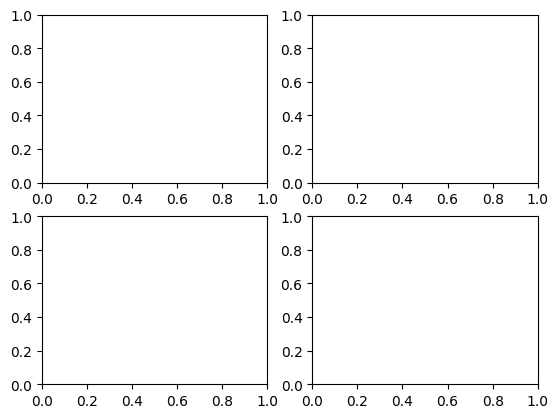

In [25]:
fig, axs = plt.subplots(2,2)  # a figure with a 2*2 grid of axis

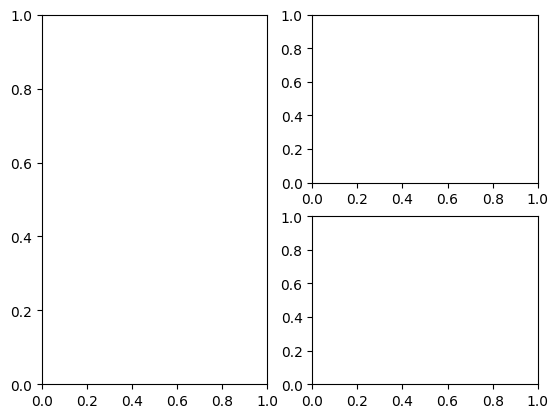

In [26]:
fig, axs = plt.subplot_mosaic([['left','right_top'],['left','right_bottom']])

## Axes

axes where plots are attached. axes containes 2 axis (x,y) and 3 axis (x,y,z) for 2-D and 3-D plots respectively.

In [27]:
# important values

# title, xlabel, ylabel

## Axis 

this sets the scale and limits and generate ticks and ticklabels. **Locater**and **formatter** helps to fine control the ticks and ticklabels

In [28]:
# important values

#

## Artist

main object in matplotlib which renders everything on the axes. 

# Types of inputs

## Numpy.array

In [29]:
x = np.array([1,2,3,4,5])
y = x**2

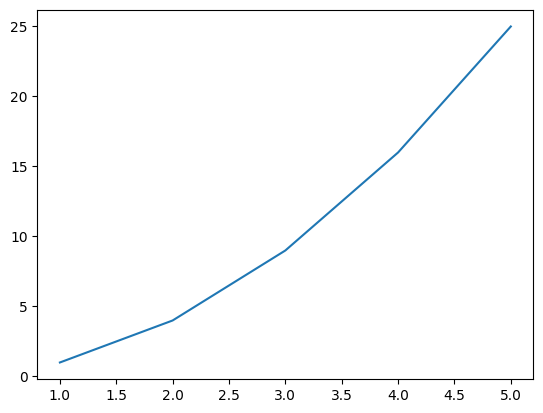

In [30]:
fig, ax = plt.subplots()

ax.plot(x,y)

plt.show()

## Numpy.ma.masked_array

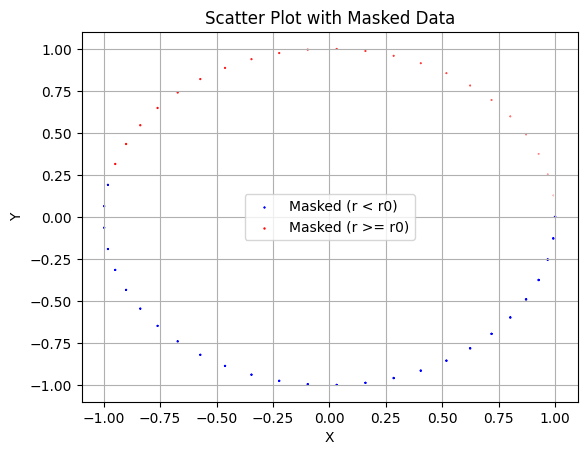

In [31]:
# Generate some example data
r = np.linspace(0, 1, 50)
x = np.cos(2 * np.pi * r)
y = np.sin(2 * np.pi * r)

# Define a threshold radius (r0)
r0 = 0.45

# Create a mask for points where r < r0
area1 = np.ma.masked_where(r < r0, r)

# Create a mask for points where r >= r0
area2 = np.ma.masked_where(r >= r0, r)

# Scatter plot with masked data
plt.scatter(x, y, s=area1, marker='*', c='blue', label='Masked (r < r0)')
plt.scatter(x, y, s=area2, marker='o', c='red', label='Masked (r >= r0)')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Masked Data')
plt.legend()
plt.grid(True)
plt.show()

## Numpy.asarray

arrays like data objects ex: pandas data frame or numpy.matrix may not work as inteded. so please pass the data to **numpy.asarray** before plotting

In [32]:
matrix = np.matrix([[1,3,2],[0,2,1.5]])
matrix_as_array = np.asarray(matrix)


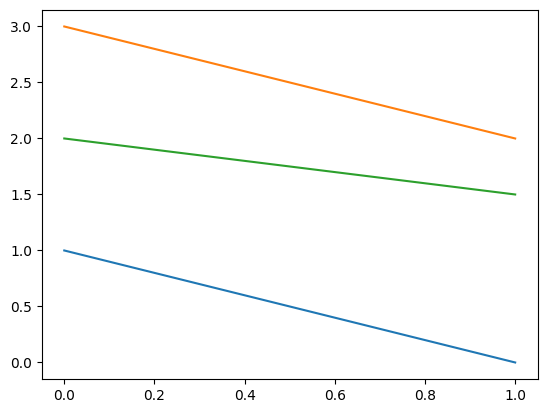

In [33]:
fig, ax = plt.subplots()

ax.plot(matrix_as_array)

plt.show()

In [34]:
# most methods will parse string indexed objects like dict, pandas dataframe, structured numpy array

# still matplotlib allows data keyword where you can pass whole dataframe and gives string row names as data to plot

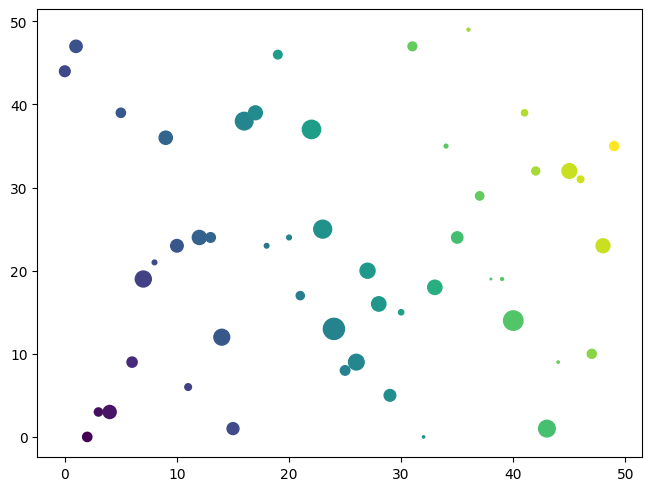

In [35]:

np.random.seed(0)

data= {"a":np.arange(50),
       "b":np.random.randint(0,50,50),
       "d":np.random.randn(50)}
data["c"] = 3 * data["a"] + data["b"]
data["d"] = np.abs(data["d"])*100

fig, ax = plt.subplots(layout="constrained")

ax.scatter("a","b",c="c", s="d", data=data)

plt.show()



# Coding styles

<ul>There is two ways of creating plots
<li>create figures and axes. then calling methods on them - object oriend method</li>
<li>rely on pyplot to create and manage figures and axes. then pyplot functions for plotting</li></ul>

## Object - oriend method

In [36]:
x = np.linspace(0,2,100)


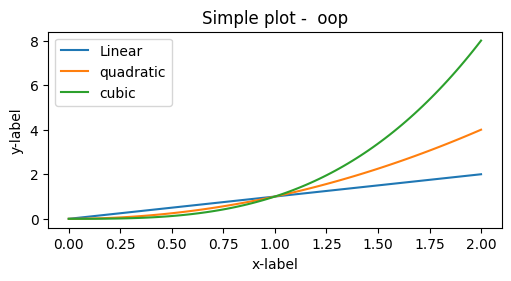

In [37]:
fig, ax = plt.subplots(figsize=(5,2.7), layout="constrained")

ax.plot(x,x, label="Linear")

ax.plot(x, x**2, label="quadratic")

ax.plot(x, x**3, label="cubic")

ax.set_xlabel("x-label")

ax.set_ylabel("y-label")

ax.set_title("Simple plot -  oop")

ax.legend()

plt.show()

## pyplot method

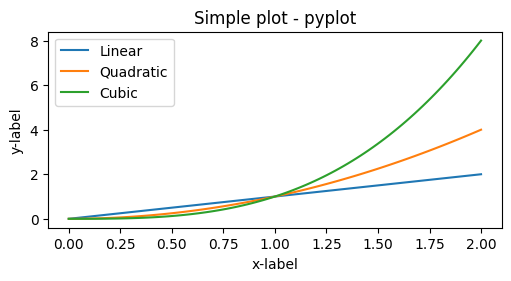

In [38]:
plt.figure(figsize=(5,2.7), layout="constrained")

plt.plot(x,x,label="Linear")

plt.plot(x,x**2, label="Quadratic")

plt.plot(x,x**3, label="Cubic")

plt.xlabel("x-label")

plt.ylabel("y-label")

plt.title("Simple plot - pyplot")

plt.legend()

plt.show()

<p>OOps method is recommended. use pyplot for quick plots</p>

### helper functions

In [39]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

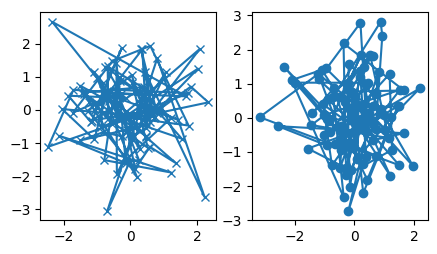

In [40]:
data1, data2, data3, data4 = np.random.randn(4,100)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(5,2.7))

my_plotter(ax1, data1, data2, {"marker":"x"})
my_plotter(ax2, data3, data4, {"marker":"o"})

plt.show()